In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots

First Analysis of how quasi thresholding does on its own

In [2]:
epi_quasi_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\0\quasi")
epi_quasi_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\1\quasi")

In [3]:
epi_quasi_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [4]:
epi_quasi_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [4]:
for i, pth in enumerate(epi_quasi_ec_folder.iterdir()):
    current = np.load(pth)
    epi_quasi_ec_results[i, :, :, :] = current.copy()

In [6]:
for i, pth in enumerate(epi_quasi_eo_folder.iterdir()):
    current = np.load(pth)
    epi_quasi_eo_results[i, :, :, :] = current.copy()

In [5]:
epi_quasi_results = epi_quasi_ec_results.__add__(epi_quasi_eo_results)/2

In [ ]:
wang_quasi_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\0\quasi")
wang_quasi_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\1\quasi")

In [ ]:
wang_quasi_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [ ]:
wang_quasi_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [ ]:
for i, pth in enumerate(wang_quasi_ec_folder.iterdir()):
    current = np.load(pth)
    wang_quasi_ec_results[i, :, :, :] = current.copy()

In [ ]:
for i, pth in enumerate(wang_quasi_eo_folder.iterdir()):
    current = np.load(pth)
    wang_quasi_eo_results[i, :, :, :] = current.copy()

In [ ]:
wang_quasi_results = wang_quasi_ec_results.__add__(wang_quasi_eo_results)/2

In [6]:
srm_quasi_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_2_extended\quasi")

In [7]:
srm_quasi_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [8]:
for i, pth in enumerate(srm_quasi_folder.iterdir()):
    current = np.load(pth)
    srm_quasi_results[i, :, :, :] = current.copy()

In [9]:
spis_quasi_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\results_run_2_extended\quasi")

In [10]:
spis_quasi_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [11]:
for i, pth in enumerate(spis_quasi_folder.iterdir()):
    current = np.load(pth)
    spis_quasi_results[i, :, :, :] = current.copy()

In [12]:
quasi_results = np.zeros(
    (   
        64,
        2,
        4,
        5
    )
)

In [13]:
quasi_results[0:16, :, :, :] = epi_quasi_results
quasi_results[16:32, :, :, :] = srm_quasi_results
quasi_results[32:48, :, :, :] = spis_quasi_results
quasi_results[48:64, :, :, :] = wang_quasi_results

In [ ]:
print(np.argwhere(np.isnan(quasi_results)))

In [14]:
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 0], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 1], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 2], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 3], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 4], 0)), (2, 4)))

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 0)


In [15]:
#best median
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 0], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 1], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 2], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 3], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 4], 0)), (2, 4)))

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

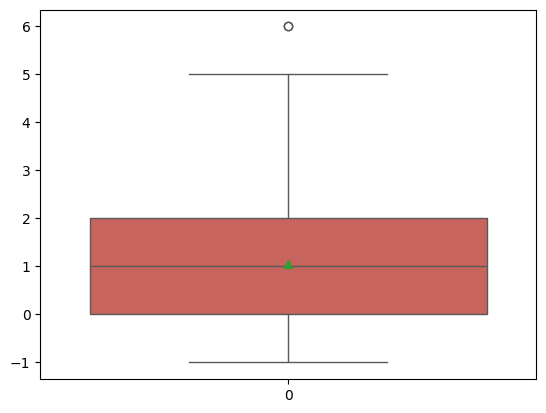

In [16]:
plot_n_boxplots([quasi_results[:, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

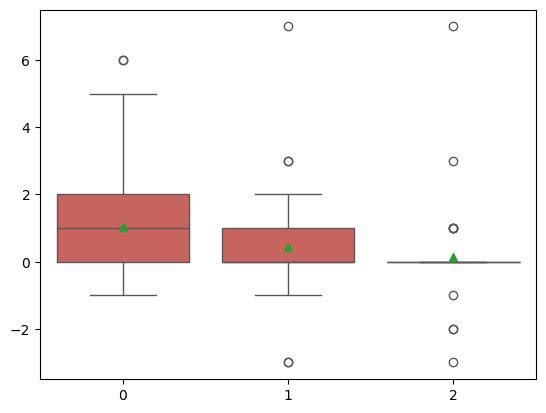

In [17]:
plot_n_boxplots([quasi_results[:, 0, 0, 1].flatten(), quasi_results[:, 0, 1, 1].flatten(), quasi_results[:, 0, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

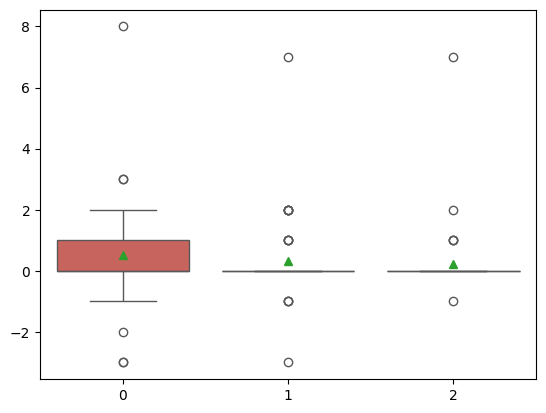

In [21]:
plot_n_boxplots([quasi_results[:, 1, 0, 1].flatten(), quasi_results[:, 1, 1, 1].flatten(), quasi_results[:, 1, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [22]:
print(quasi_results[:, 0, 0, 1].flatten())

[ 1. -1. -1.  0.  3.  1.  1.  1.  0. -1.  3.  1.  0.  2.  1.  2.  4.  1.
 -1.  2.  2.  2.  5.  6.  2. -1.  0.  1.  0.  2. -1.  6.  0.  0.  0.  0.
 -1.  4. -1.  1.  0. -1.  0.  3. -1.  1.  3. -1.]


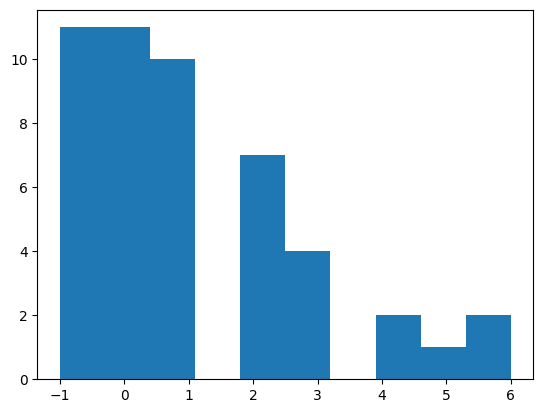

In [23]:
plt.hist(quasi_results[:, 0, 0, 1])
plt.show()

In [24]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 0, 0, 1], popmean=0) 
print(t_statistic , p_value)

3.888235287247468 0.0003160882481907219


Investigating the statisitcs of itteration maximazing the average number of biological components.

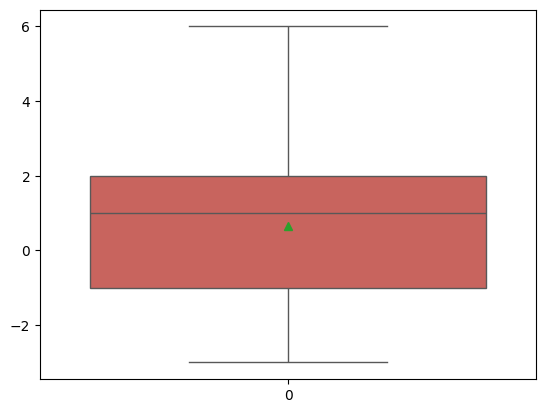

In [25]:
plot_n_boxplots([quasi_results[:, 0, 0, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

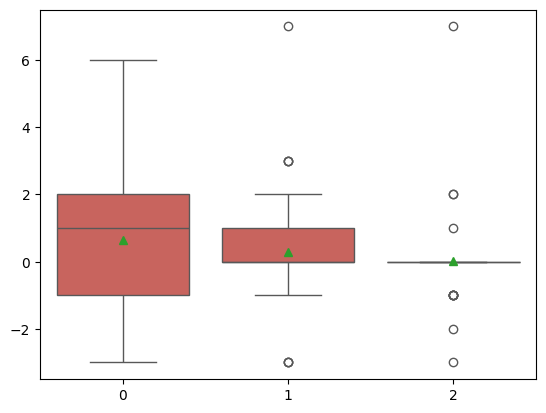

In [27]:
plot_n_boxplots([quasi_results[:, 0, 0, 2].flatten(), quasi_results[:, 0, 1, 2].flatten(), quasi_results[:, 0, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

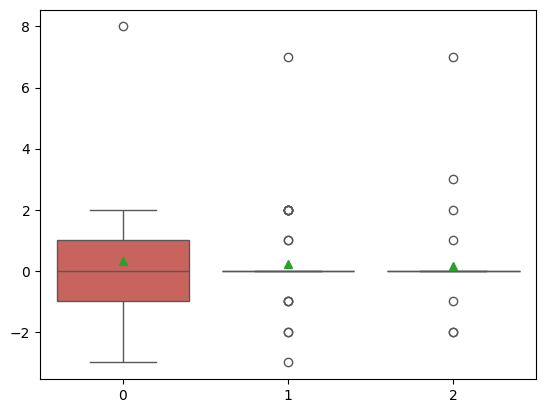

In [28]:
plot_n_boxplots([quasi_results[:, 1, 0, 2].flatten(), quasi_results[:, 1, 1, 2].flatten(), quasi_results[:, 1, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [29]:
print(quasi_results[:, 0, 0, 2].flatten())

[-3. -2. -1.  2.  1.  1.  1.  1.  2. -3.  0.  1.  0.  3. -1.  2.  2.  0.
 -1.  0.  2.  2.  3.  5.  0. -2. -1.  1.  1.  4.  1.  6.  0.  1.  0.  1.
 -1.  3. -1.  1.  0. -1.  0.  2. -1. -2.  3. -1.]


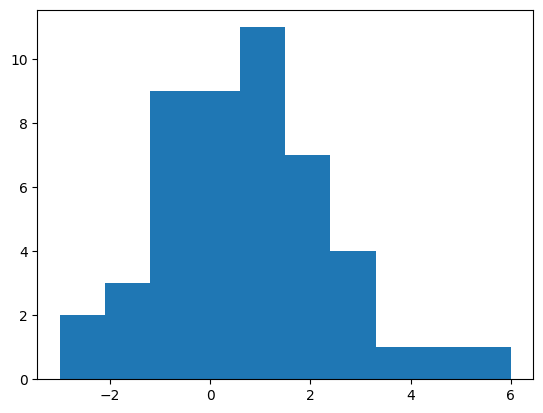

In [30]:
plt.hist(quasi_results[:, 0, 0, 2])
plt.show()

In [31]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 1, 0, 2], popmean=0) 
print(t_statistic , p_value)

1.2713107750103814 0.2098738428285435


Then Analysis of how peaks thresholding does on its own

In [32]:
epi_peak_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\0\peak")
epi_peak_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\1\peak")

In [33]:
epi_peak_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [37]:
epi_peak_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [34]:
for i, pth in enumerate(epi_peak_ec_folder.iterdir()):
    current = np.load(pth)
    epi_peak_ec_results[i, :, :, :] = current.copy()

In [39]:
for i, pth in enumerate(epi_peak_eo_folder.iterdir()):
    current = np.load(pth)
    epi_peak_eo_results[i, :, :, :] = current.copy()

In [35]:
epi_peak_results = epi_peak_ec_results.__add__(epi_peak_eo_results)/2

In [ ]:
wang_peak_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\0\peak")
wang_peak_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\1\peak")

In [ ]:
wang_peak_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [ ]:
wang_peak_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [ ]:
for i, pth in enumerate(wang_peak_ec_folder.iterdir()):
    current = np.load(pth)
    wang_peak_ec_results[i, :, :, :] = current.copy()

In [ ]:
for i, pth in enumerate(wang_peak_eo_folder.iterdir()):
    current = np.load(pth)
    wang_peak_eo_results[i, :, :, :] = current.copy()

In [ ]:
wang_peak_results = wang_peak_ec_results.__add__(wang_peak_eo_results)/2

In [36]:
srm_peak_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_2_extended\peak")

In [37]:
srm_peak_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [38]:
for i, pth in enumerate(srm_peak_folder.iterdir()):
    current = np.load(pth)
    srm_peak_results[i, :, :, :] = current.copy()

In [39]:
spis_peak_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\results_run_2_extended\peak")

In [40]:
spis_peak_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [41]:
for i, pth in enumerate(spis_peak_folder.iterdir()):
    current = np.load(pth)
    spis_peak_results[i, :, :, :] = current.copy()

In [42]:
peak_results = np.zeros(
    (   
        64,
        2,
        4,
        5
    )
)

In [43]:
peak_results[0:16, :, :, :] = epi_peak_results
peak_results[16:32, :, :, :] = srm_peak_results
peak_results[32:48, :, :, :] = spis_peak_results
peak_results[48:64, :, :, :] = wang_peak_results

In [ ]:
print(np.argwhere(np.isnan(peak_results)))
print(np.argwhere(np.isnan(peak_results)))

In [44]:
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 0], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 1], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 2], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 3], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 4], 0)), (2, 4)))

(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)


In [45]:
#best median
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 0], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 1], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 2], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 3], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 4], 0)), (2, 4)))

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

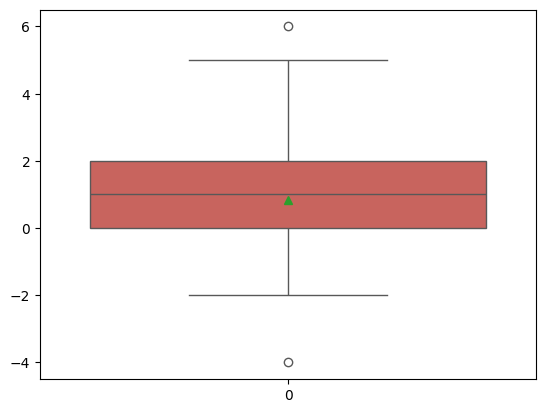

In [46]:
plot_n_boxplots([peak_results[:, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

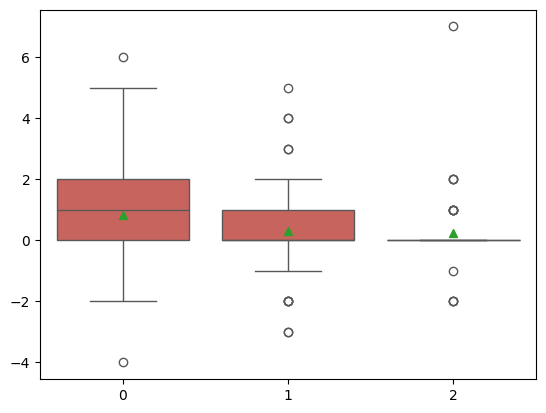

In [47]:
plot_n_boxplots([peak_results[:, 0, 0, 1].flatten(), peak_results[:, 0, 1, 1].flatten(), peak_results[:, 0, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

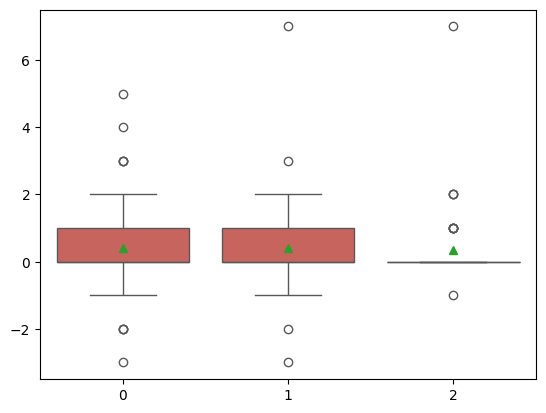

In [48]:
plot_n_boxplots([peak_results[:, 1, 0, 1].flatten(), peak_results[:, 1, 1, 1].flatten(), peak_results[:, 1, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [49]:
print(peak_results[:, 0, 0, 1].flatten())

[-1. -1.  0.  1.  4. -2.  2.  2.  3.  2.  0.  0. -1.  5.  0.  0.  0.  3.
  2.  0.  2.  2.  6.  1.  3. -4.  0.  1.  0.  3.  0.  3. -1.  0.  1.  1.
 -1.  4.  2.  1. -2. -1.  0.  1. -2.  1.  1. -1.]


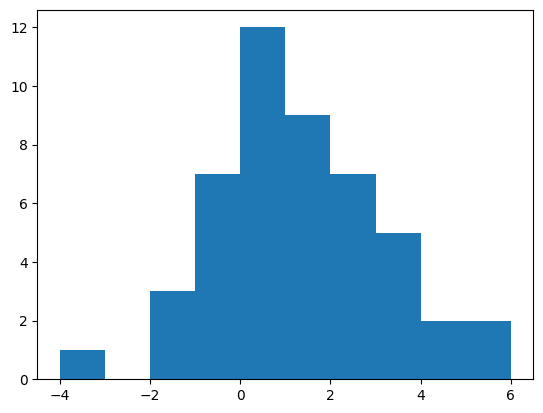

In [50]:
plt.hist(peak_results[:, 0, 0, 1])
plt.show()

In [51]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 0, 0, 1], popmean=0) 
print(t_statistic , p_value)

2.977906064385156 0.004578334939736756


Investigating the statisitcs of itteration maximazing the average number of biological components.

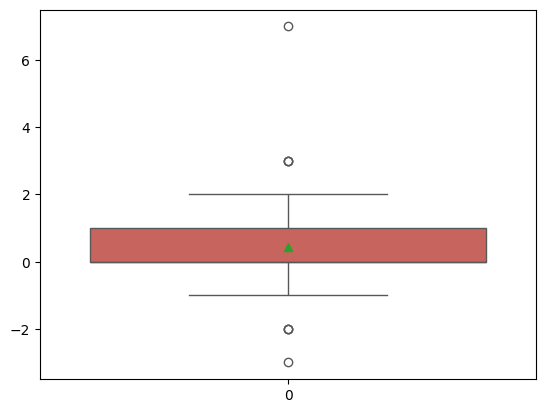

In [52]:
plot_n_boxplots([peak_results[:, 1, 1, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

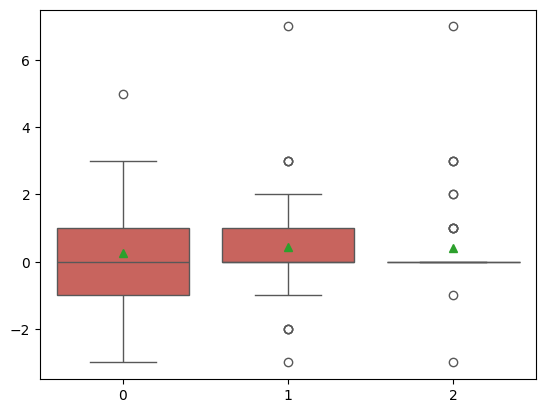

In [53]:
plot_n_boxplots([peak_results[:, 1, 0, 2].flatten(), peak_results[:, 1, 1, 2].flatten(), peak_results[:, 1, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to mean

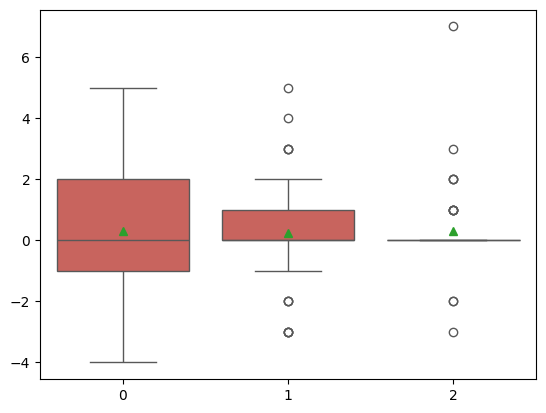

In [54]:
plot_n_boxplots([peak_results[:, 0, 0, 2].flatten(), peak_results[:, 0, 1, 2].flatten(), peak_results[:, 0, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [56]:
print(peak_results[:, 1, 1, 2].flatten())

[ 0.  0.  3.  1. -1.  1.  0.  2.  0.  0. -2.  2. -2.  2.  3.  0.  0.  1.
  3.  1.  0.  0.  0.  0.  0. -3. -2.  0.  0.  2.  1.  7.  0.  0.  0.  0.
  0.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0. -1.]


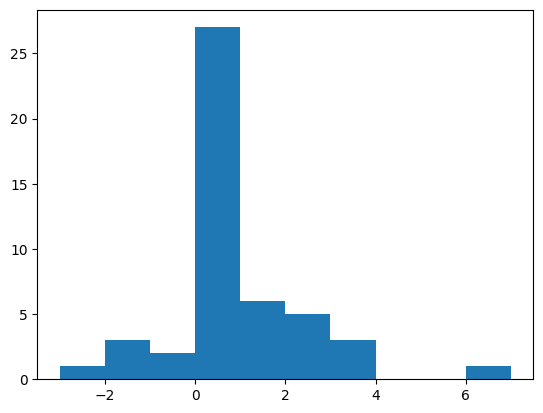

In [57]:
plt.hist(peak_results[:, 1, 1, 2])
plt.show()

In [58]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 1, 1, 2], popmean=0) 
print(t_statistic , p_value)

1.930944924137912 0.059534137935044855


Then comined!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [60]:
epi_combined_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\0\combined")
epi_combined_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\1\combined")

In [61]:
epi_combined_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [71]:
epi_combined_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [62]:
for i, pth in enumerate(epi_combined_ec_folder.iterdir()):
    current = np.load(pth)
    epi_combined_ec_results[i, :, :, :, :, :] = current.copy()

In [73]:
for i, pth in enumerate(epi_combined_eo_folder.iterdir()):
    current = np.load(pth)
    epi_combined_eo_results[i, :, :, :, :, :] = current.copy()

In [63]:
epi_combined_results = epi_combined_ec_results.__add__(epi_combined_ec_results)/2

In [ ]:
wang_combined_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\0\combined")
wang_combined_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\1\combined")

In [ ]:
wang_combined_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [ ]:
wang_combined_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [ ]:
for i, pth in enumerate(wang_combined_ec_folder.iterdir()):
    current = np.load(pth)
    wang_combined_ec_results[i, :, :, :, :, :] = current.copy()

In [ ]:
for i, pth in enumerate(wang_combined_eo_folder.iterdir()):
    current = np.load(pth)
    wang_combined_eo_results[i, :, :, :, :, :] = current.copy()

In [ ]:
wang_combined_results = wang_combined_ec_results.__add__(wang_combined_eo_results)/2

In [64]:
srm_combined_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_2_extended\combined")

In [65]:
srm_combined_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [66]:
for i, pth in enumerate(srm_combined_folder.iterdir()):
    current = np.load(pth)
    srm_combined_results[i, :, :, :, :, :] = current.copy()

In [67]:
spis_combined_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\results_run_2_extended\combined")

In [68]:
spis_combined_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [69]:
for i, pth in enumerate(spis_combined_folder.iterdir()):
    current = np.load(pth)
    spis_combined_results[i, :, :, :, :, :] = current.copy()

In [70]:
combined_results = np.zeros(
    (   
        48,
        2,
        4,
        2,
        4,
        5
    )
)

In [71]:
combined_results[0:16, :, :, :] = epi_combined_results
combined_results[16:32, :, :, :] = srm_combined_results
combined_results[32:48, :, :, :] = spis_combined_results
combined_results[48:62, :, :, :] = wang_combined_results

In [ ]:
print(np.argwhere(np.isnan(combined_results)))
print(np.argwhere(np.isinf(combined_results)))

In [105]:
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 0], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 1], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 2], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 3], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 4], 0)), (2, 4, 2, 4)))

(0, 0, 0, 0)
(0, 0, 1, 0)
(0, 0, 1, 0)
(0, 0, 1, 0)
(0, 0, 1, 0)


In [73]:
#best median
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 0], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 1], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 2], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 3], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 4], 0)), (2, 4, 2, 4)))

(0, 0, 0, 0)
(0, 0, 1, 0)
(0, 0, 0, 0)
(0, 0, 1, 0)
(0, 0, 1, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

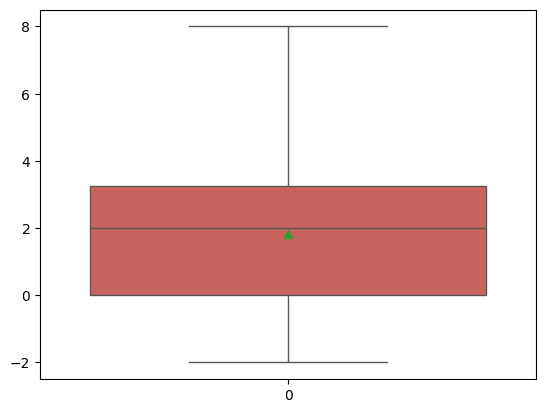

In [109]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

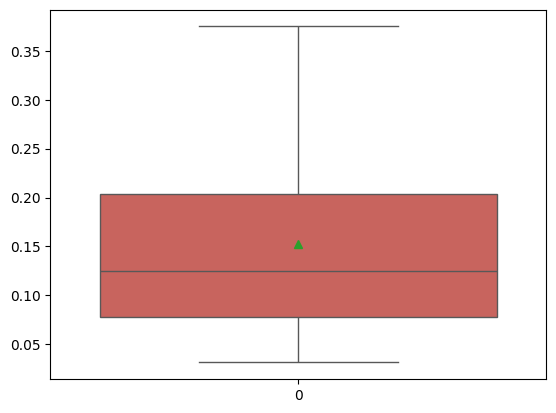

In [110]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 0].flatten()], [sns.xkcd_rgb["pale red"]])

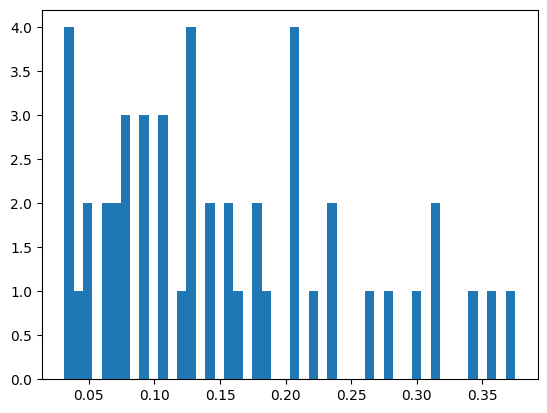

In [111]:
plt.hist(combined_results[:, 0, 0, 1, 0, 0].flatten(), bins=48)
plt.show()

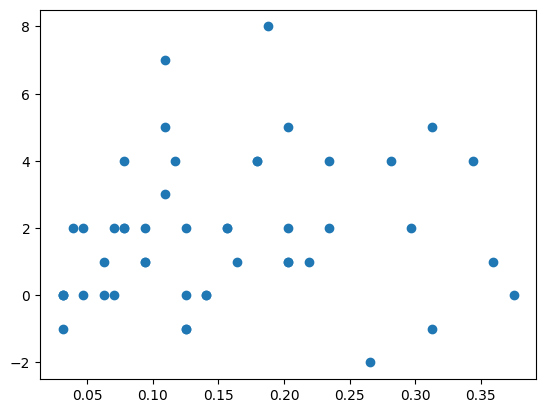

In [112]:
plt.scatter(combined_results[:, 0, 0, 1, 0, 0], combined_results[:, 0, 0, 1, 0, 1])
plt.show()

Compared to the other thresholds

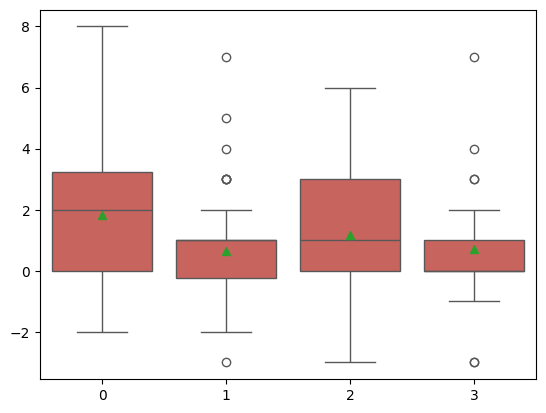

In [76]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 1], combined_results[:, 0, 1, 1, 0, 1], combined_results[:, 0, 0, 1, 1, 1], combined_results[:, 0, 1, 1, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

all median?

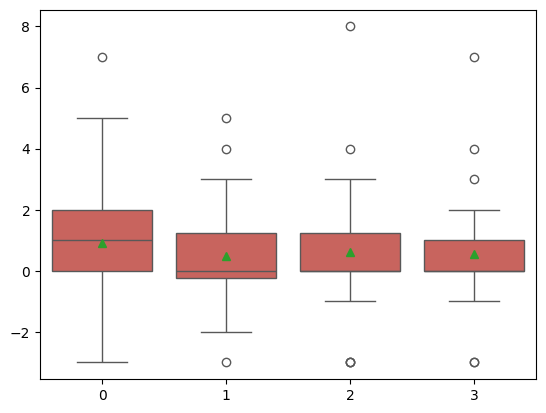

In [77]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 0, 1], combined_results[:, 1, 1, 1, 0, 1], combined_results[:, 1, 0, 1, 1, 1], combined_results[:, 1, 1, 1, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Quasi median?

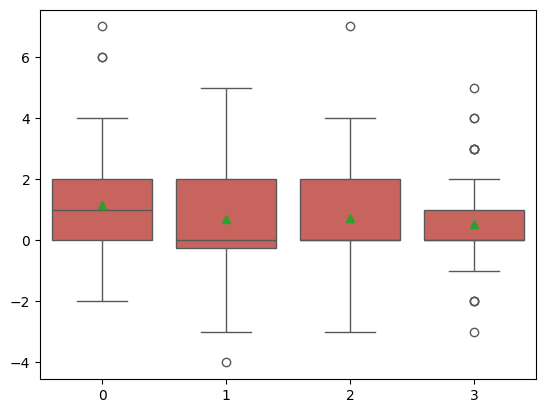

In [78]:
plot_n_boxplots([combined_results[:, 1, 0, 0, 0, 1], combined_results[:, 1, 1, 0, 0, 1], combined_results[:, 1, 0, 0, 1, 1], combined_results[:, 1, 1, 0, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

dont like that

all mean?

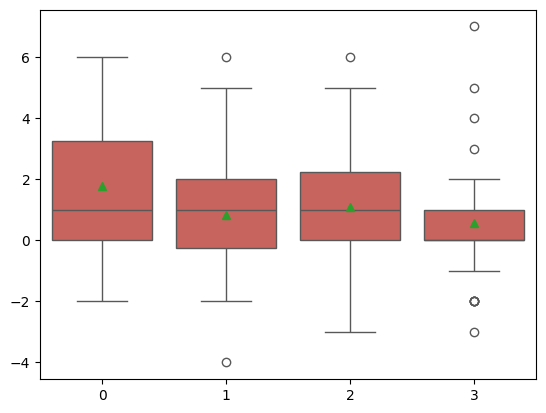

In [79]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 1], combined_results[:, 0, 1, 0, 0, 1], combined_results[:, 0, 0, 0, 1, 1], combined_results[:, 0, 1, 0, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Not tooo excited about that one either

More stats for the best one.

In [80]:
print(combined_results[:, 0, 0, 1, 0, 1].flatten())

[ 1.  1.  0. -1.  4.  0.  4.  2.  1.  2.  2.  4. -2.  4.  0.  2.  5.  1.
  5.  2.  2.  2.  8.  4.  2.  1.  0.  0.  1.  3.  0.  7.  1.  0.  2.  0.
  0.  5. -1.  2.  2. -1.  2.  4.  0.  1.  4. -1.]


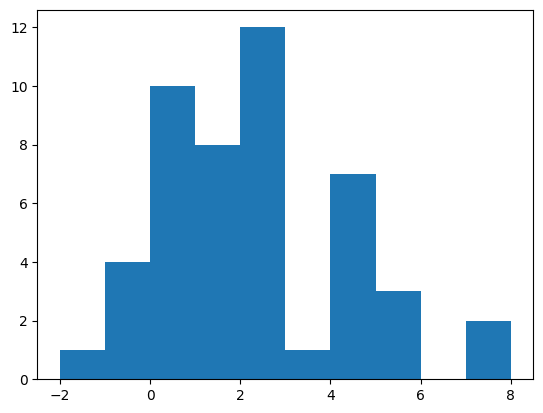

In [82]:
plt.hist(combined_results[:, 0, 0, 1, 0, 1])
plt.show()

In [83]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 0, 0, 1, 0, 1], popmean=0) 
print(t_statistic , p_value)

5.86695748498522 4.2768250898235956e-07


Investigating the statisitcs of itteration maximazing the average number of biological components.

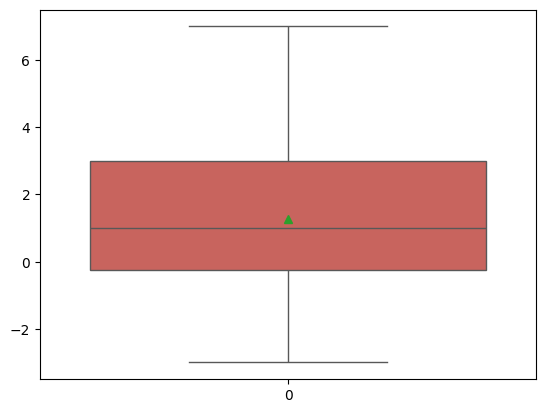

In [113]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

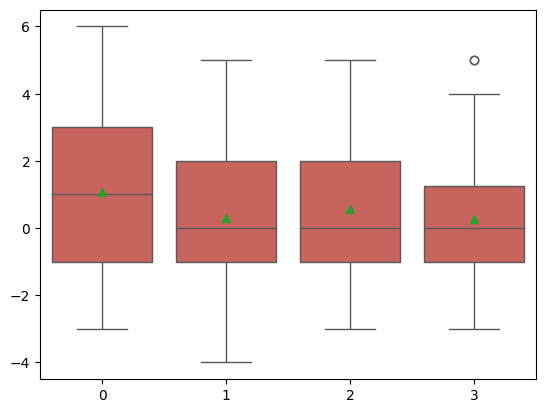

In [85]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 2], combined_results[:, 0, 1, 0, 0, 2], combined_results[:, 0, 0, 0, 1, 2], combined_results[:, 0, 1, 0, 1, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

all median?

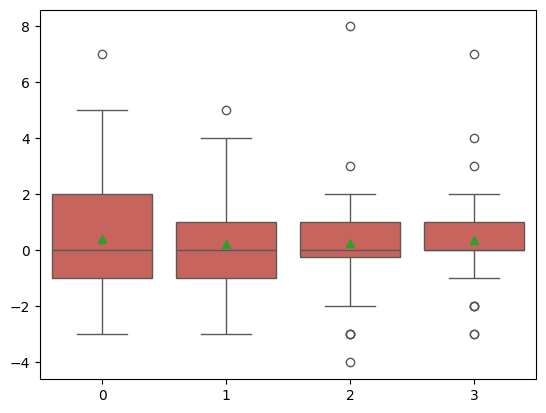

In [86]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 0, 2], combined_results[:, 1, 1, 1, 0, 2], combined_results[:, 1, 0, 1, 1, 2], combined_results[:, 1, 1, 1, 1, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

No bueno
all mean?

More stats for the best one.

In [89]:
print(combined_results[:, 0, 0, 0, 0, 2].flatten())

[-3. -3. -2. -3.  3.  3.  2.  2. -1.  1. -3.  6. -3.  4.  0.  0.  3.  5.
  5.  0.  1.  2.  4.  5.  0. -2. -1. -2.  2.  6.  4.  5.  0.  1.  1.  1.
 -1.  4.  2.  1.  2. -2.  1.  2. -2. -2.  5. -1.]


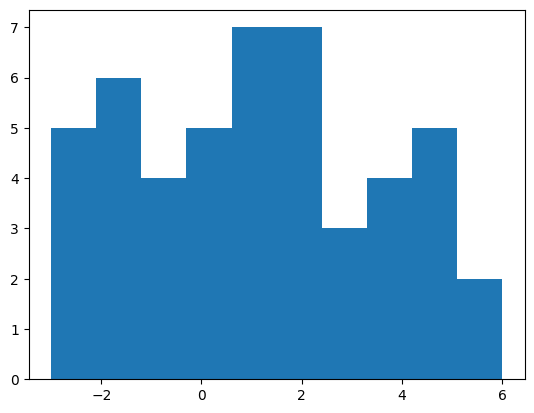

In [92]:
plt.hist(combined_results[:, 0, 0, 0, 0, 2])
plt.show()

In [93]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 0, 0, 0, 0, 2], popmean=0) 
print(t_statistic , p_value)

2.791934268173548 0.00755180889926576


best from each con of distributions

Best mean

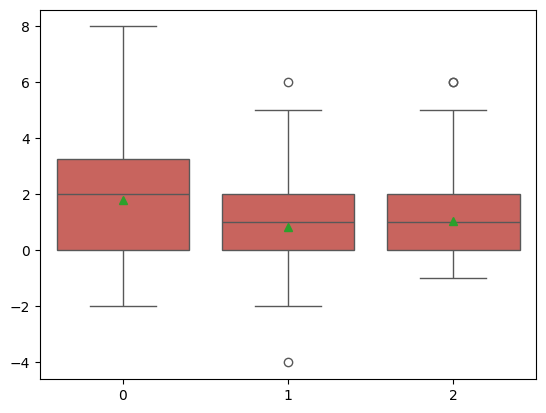

In [94]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 1], peak_results[:, 0, 0, 1], quasi_results[:, 0, 0, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

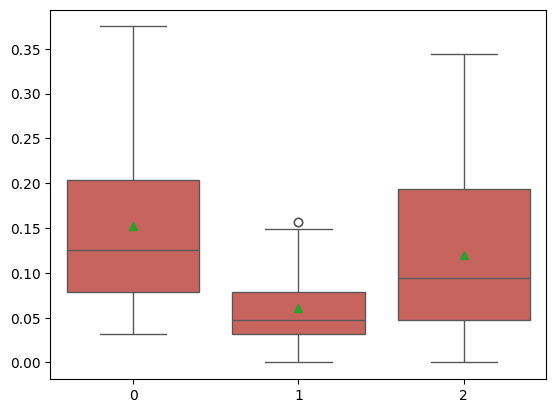

In [96]:
# discarded
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 0], peak_results[:, 0, 0, 0], quasi_results[:, 0, 0, 0]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Best biocomp

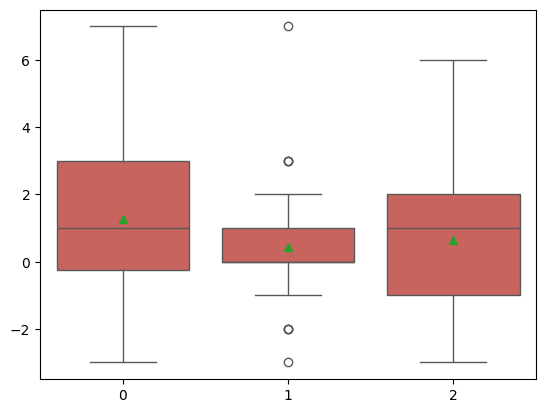

In [115]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 2], peak_results[:, 1, 1, 2], quasi_results[:, 0, 0, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

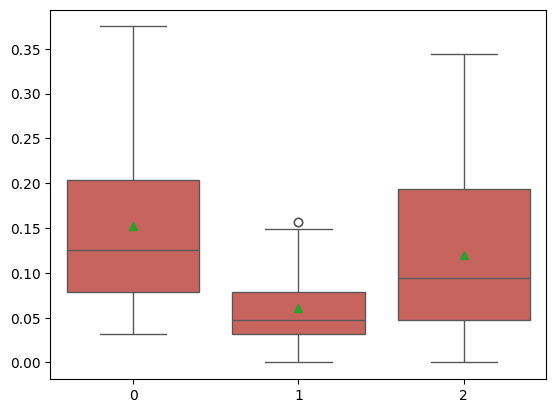

In [116]:
#Discarded
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 0], peak_results[:, 0, 0, 0], quasi_results[:, 0, 0, 0]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])